<a href="https://colab.research.google.com/github/CallSohail/Bridging-the-Gap-in-Text-Based-Emotion-Detection/blob/main/Bridging_the_Gap_in_Text_Based_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np

## Code that mount the data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


It show that how many folders and files we have in `Public_data`

In [ ]:
import os
# Path to your specific folder
data_folder = '/content/drive/MyDrive/public_data'

# List files in the folder
os.listdir(data_folder)


['dev', 'train']

We have two folder in Public_data, the one is dev and the other is train and it has a also subfoler in this

In [ ]:
import os

# Paths to the two folders within 'public_data'
folder1 = '/content/drive/MyDrive/public_data/dev'
folder2 = '/content/drive/MyDrive/public_data/train'

# Function to list all files and subfolders recursively in a formatted way
def list_files_in_folder(folder_path, indent=0):
    indent_str = '  ' * indent  # Indentation for formatting
    for root, dirs, files in os.walk(folder_path):
        # Get the relative path to display only subfolder names
        relative_path = os.path.relpath(root, folder_path)

        # Print the folder name
        if relative_path == '.':
            print(f"{indent_str}Folder: {os.path.basename(folder_path)}")
        else:
           print(f"{indent_str}Subfolder: {relative_path}")

            # Print files in the current folder
        if files:
            file_list = ', '.join(files)
            print(f"{indent_str}  Files: {file_list}")

        # Increment indent for subfolders
        indent += 1

# List files and subfolders in 'dev' folder
print("Contents of 'dev' folder:")
list_files_in_folder(folder1)

# List files and subfolders in 'train' folder
print("\nContents of 'train' folder:")
list_files_in_folder(folder2)


Contents of 'dev' folder:
Folder: dev
Subfolder: track_c
  Files: jav_c.csv, tir_c.csv, oro_c.csv, ind_c.csv, sun_c.csv, deu_c.csv, amh_c.csv, ptbr_c.csv, afr_c.csv, rus_c.csv, eng_c.csv, som_c.csv
Subfolder: track_b
  Files: rus_b.csv, deu_b.csv, ptbr_b.csv, eng_b.csv, amh_b.csv
Subfolder: track_a
  Files: oro_a.csv, sun_a.csv, deu_a.csv, afr_a.csv, amh_a.csv, ptbr_a.csv, tir_a.csv, som_a.csv, eng_a.csv, rus_a.csv

Contents of 'train' folder:
Folder: train
Subfolder: track_b
  Files: ptbr.csv, deu.csv, eng.csv, amh.csv, rus.csv
Subfolder: track_a
  Files: rus.csv, tir.csv, oro.csv, som.csv, afr.csv, ptbr.csv, deu.csv, sun.csv, amh.csv, eng.csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/public_data/train/track_a/eng.csv')

In [ ]:
df.head()

,id,text,Anger,Fear,Joy,Sadness,Surprise
0,eng_train_track_a_00001,But not very happy.,0,0,1,1,0
1,eng_train_track_a_00002,Well she's not gon na last the whole song like...,0,0,1,0,0
2,eng_train_track_a_00003,She sat at her Papa's recliner sofa only to mo...,0,0,0,0,0
3,eng_train_track_a_00004,"Yes, the Oklahoma city bombing.",1,1,0,1,1
4,eng_train_track_a_00005,They were dancing to Bolero.,0,0,1,0,0


## What This Code Does:
1. Loads the dataset using Pandas'` read_csv()`.
2. Counts rows and columns with `.shape`.
3. Shows data types of each column with `.dtypes`.
4. Counts missing/null values for each column with `.isnull().sum()`.
5. Identifies columns with missing values and the total number of missing values.
6. Counts duplicate rows using `.duplicated().sum()`.
7. Provides basic descriptive statistics for numerical columns using .`describe()`.

In [ ]:
import pandas as pd

def dataset_summary(file_path):
    # Load the dataset
    df = pd.read_csv('/content/drive/MyDrive/public_data/train/track_a/eng.csv')

    # Collect key details
    num_rows, num_columns = df.shape
    data_types = df.dtypes
    null_values = df.isnull().sum()
    missing_data_cols = null_values[null_values > 0].count()
    duplicate_rows = df.duplicated().sum()
    total_missing_values = null_values.sum()

    # Summary statistics
    basic_stats = df.describe()

    # Create the summary
    summary = f"""
     The dataset contains {num_rows} rows and {num_columns} columns.

     Column Data Types:
      {data_types.to_string()}

       There are {missing_data_cols} columns with missing values. The total number of missing values in the dataset is {total_missing_values}.

                                                                                Here is a breakdown of missing values per column:
                                                                                    {null_values.to_string()}

                                                                                        The dataset contains {duplicate_rows} duplicate rows.

                                                                                            Here are some basic summary statistics for numerical columns:
                                                                                                {basic_stats.to_string()}

                                                                                                    """
    return summary
# Example usage:
file_path = 'your_dataset.csv'  # Replace with your actual file path
print(dataset_summary(file_path))



     The dataset contains 2768 rows and 7 columns.
                                                            
     Column Data Types:
      id          object
text        object
Anger        int64
Fear         int64
Joy          int64
Sadness      int64
Surprise     int64

       There are 0 columns with missing values. The total number of missing values in the dataset is 0.
                                                                            
                                                                                Here is a breakdown of missing values per column:
                                                                                    id          0
text        0
Anger       0
Fear        0
Joy         0
Sadness     0
Surprise    0

                                                                                        The dataset contains 0 duplicate rows.

                                                                                            Here are 

# Text Preprocessing
Clean the text data by removing unnecessary characters, lowercasing, and possibly removing stopwords.

In [ ]:
import re
import string

# Function to clean the text
def clean_text(text):
    # Lowercase
    text = text.lower()
      # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text

                            # Apply cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

# Label Preparation
Create the label set for multi-label classification by selecting the emotion columns (`Anger`, `Fear`, etc.).

In [ ]:
# Define the emotion labels
emotion_labels = ['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise']

# Extract features (text) and labels (emotions)
X = df['cleaned_text']
y = df[emotion_labels]
print(f"Details of {X} and details of {y}.")

Details of 0                                      but not very happy
1       well shes not gon na last the whole song like ...
2       she sat at her papas recliner sofa only to mov...
3                           yes the oklahoma city bombing
4                             they were dancing to bolero
                              ...                        
2763                      yeah but did you just find that
2764    i did as little as possible with my right hand...
2765                                okay that sucks right
2766    the spark leaped through his body into mine an...
2767     he had  inches and  pounds on me and i still won
Name: cleaned_text, Length: 2768, dtype: object and details of       Anger  Fear  Joy  Sadness  Surprise
0         0     0    1        1         0
1         0     0    1        0         0
2         0     0    0        0         0
3         1     1    0        1         1
4         0     0    1        0         0
...     ...   ...  ...      ...     

# Data Splitting
Split the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
#spliting the data into training and testing datasets (80/20).
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)


## Text Vectorization
Convert the text data into a numerical form using **TF-IDF** or **CountVectorizer**.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)

### Model Selection
 For multi-label classification, you can use models like:

 * **Logistic Regression** with one-vs-rest classification
 * **Random Forest** with multi-output
 * **Support Vector Machine (SVM)** using one-vs-rest strategy
 * **Deep learning models** such as Recurrent Neural Networks (RNNs or
BERT can also be used for more sophisticated approaches.

 We’ll start with **Logistic Regression** using the **OneVsRestClassifie**r.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

# Create the model pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
        ('clf', OneVsRestClassifier(LogisticRegression()))
        ])

        # Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf', OneVsRestClassifier(estimator=LogisticRegression()))])

## **Evaluation**
Evaluate the model using metrics such as **F1-Score** (since the task mentions F1-score evaluation).

In [ ]:
from sklearn.metrics import classification_report, f1_score

# Predict on the test set
y_pred = model.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred, target_names=emotion_labels))

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='micro')
print(f'F1-Score (Micro): {f1}')

              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        61
        Fear       0.63      0.88      0.73       314
         Joy       0.50      0.01      0.01       134
     Sadness       0.60      0.09      0.15       171
    Surprise       0.77      0.24      0.36       172

   micro avg       0.64      0.39      0.49       852
   macro avg       0.50      0.24      0.25       852
weighted avg       0.59      0.39      0.38       852
 samples avg       0.51      0.36      0.40       852

F1-Score (Micro): 0.4858181818181818


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
# Step 1: Install the required libraries
!pip install -q tensorflow==2.12.0 transformers==4.28.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source o

In [ ]:
!pip install transformers


In [ ]:
# Define the emotion labels
emotion_labels = ['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise']  # If 'Disgust' is present

# Load BERT model and tokenizer
from transformers import BertTokenizer, TFBertForSequenceClassification

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(emotion_labels))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Import necessary libraries
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC

# Step 1: Define the emotion labels
emotion_labels = ['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise']  # Adjust as necessary

# Step 2: Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(emotion_labels))

# Step 3: Tokenize the data
def tokenize_text(texts, max_len=128):
    return tokenizer(
        texts.tolist(),
        max_length=max_len,
        padding=True,
        truncation=True,
        return_tensors='tf'
         )

         # Assuming X_train and X_test are defined
train_inputs = tokenize_text(X_train)
test_inputs = tokenize_text(X_test)

# Step 4: Compile the BERT model
model.compile(optimizer=Adam(learning_rate=2e-5),
         loss=BinaryCrossentropy(from_logits=True),
           metrics=[AUC()])

 # Step 5: Train the BERT model
history = model.fit(train_inputs['input_ids'], y_train, validation_data=(test_inputs['input_ids'], y_test), epochs=3, batch_size=16)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
139/139 [==============================] - 2725s 19s/step - loss: 0.5763 - auc_2: 0.6186 - val_loss: 0.5726 - val_auc_2: 0.6219
Epoch 2/3
139/139 [==============================] - 2653s 19s/step - loss: 0.5674 - auc_2: 0.6227 - val_loss: 0.5507 - val_auc_2: 0.6211
Epoch 3/3
139/139 [==============================] - 2665s 19s/step - loss: 0.5020 - auc_2: 0.6958 - val_loss: 0.4243 - val_auc_2: 0.7686


18/18 [==============================] - 168s 9s/step
F1 Score: 0.5360


<ipython-input-23-6f94dc9d3b4d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['F1 Score'], y=[f1], palette='viridis')


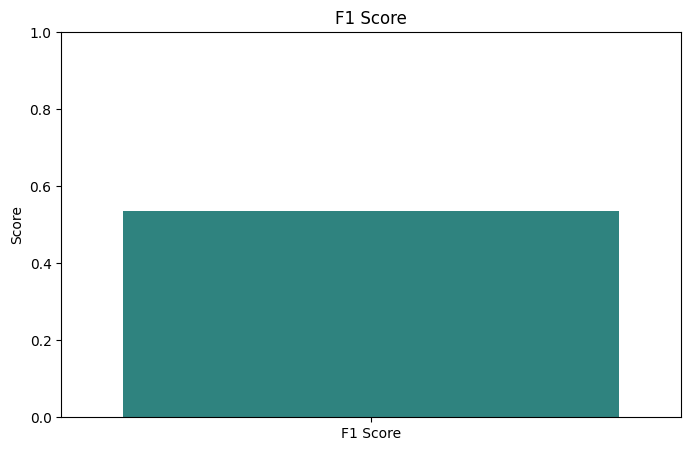

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# Assuming you have the test data and model predictions
# Step 1: Get predictions
y_pred_prob = model.predict(test_inputs['input_ids'])
y_pred_logits = y_pred_prob.logits  # Access the logits directly
y_pred = (y_pred_logits > 0).astype(int)  # Convert logits to binary predictions

# Step 2: Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1:.4f}')

# Step 3: Visualize F1 Score
plt.figure(figsize=(8, 5))
sns.barplot(x=['F1 Score'], y=[f1], palette='viridis')
plt.title('F1 Score')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set limit from 0 to 1
plt.show()
